<a href="https://colab.research.google.com/github/descobargarcia/ingenieria-quimica/blob/colab_import/02_Diagramas_Refrigerantes_Cantera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CÁLCULO Y VISUALIZACIÓN DE PROPIEDADES TERMODINÁMICAS DE REFRIGERANTES USANDO PYTHON

Los ciclos de refrigeración son de uso común en la industria química, en procesos que requieren operar a bajas temperaturas. Por lo tanto, es importante para dichos procesos disponer de herramientas confiables para calcular las propiedades de los fluidos refrigerantes. En particular, los diagramas termodinámicos Ts (temperatura - entropía) y Ph (presión - entalpía) son de utilidad para definir las condiciones operativas.

En esta publicación, veremos cómo utilizar en Python la librería [Cantera](https://cantera.org/) para calcular propiedades termodinámicas de varios fluidos, como los refrigerantes. Además, utilizaremos librerías de Ciencia de Datos como [NumPy](https://numpy.org/doc/), [pandas](https://pandas.pydata.org/docs/) y [Matplotlib](https://matplotlib.org/) para extender los cálculos a muchos puntos y visualizar los resultados como tablas y diagramas.


## Librería Cantera

Cantera es un conjunto de herramientas de código abierto para la solución de problemas que involucran cinética química, termodinámica y procesos de transporte. A diferencia de un software comercial, Cantera se puede utilizar de forma gratuita y el código fuente está disponible para que cualquier usuario pueda consultarlo.

Por ahora, aplicaremos sólo algunas funcionalidades termodinámicas de Cantera. En futuros artículos, podríamos explorar herramientas más avanzadas de esta librería. Puede consultar la documentación del proyecto y tutoriales en su [página oficial](https://cantera.org/index.html).

Para usar Cantera, primero debemos instalarla en nuestro entorno de trabajo y luego importarla, como se muestra en las próximas 2 celdas:

In [1]:
!pip install cantera

In [2]:
import cantera as ct

A continuación, se muestra una lista de algunas propiedades termodinámicas disponibles. Es importante resaltar que **Cantera** trabaja *siempre* con unidades del Sistema Internacional (**SI**):

| Variable | Propiedad                   | Unidades |
|:--------:|:---------------------------:|:--------:|
|P         | Presión                     | Pa       |
|T         | Temperatura                 | K        |
|v         | Volumen específico          | m3/kg    |
|g         | Energía de Gibbs específica | J/kg     |
|u         | Energía interna específica  | J/kg     |
|h         | Entalpía específica         | J/kg     |
|s         | Entropía específica         | J/(kg.K) |
|Q         | Calidad de vapor            | ---      |



De forma predeterminada, Cantera tiene ecuaciones de estado para los siguientes fluidos puros:

- Agua (H2O): ct.Water()
- Nitrógeno (N2): ct.Nitrogen()
- Metano (CH4): ct.Methane()
- Hidrógeno (H2): ct.Hydrogen()
- Oxígeno (O2): ct.Oxygen()
- Dióxido de Carbono (CO2): ct.CarbonDioxide()
- n-Heptano (C7H16): ct.Heptane()
- Refrigerante R134a: ct.Hfc134a()


### Ejemplo 1: Calcular las propiedades termodinámicas para vapor de agua a 10 atm y 300 ºC.

In [3]:
# Instanciamos un objeto del tipo "PureFluid"
agua = ct.Water()
# Conversión a unidades SI
P1 = 10 * 101325     # Pa
T1 = 300 + 273.15    # K
# Definimos estado termodinámico
agua.TP = T1, P1
# Visualizamos resultados
print(agua())


  water:

       temperature   573.15 K
          pressure   1.0133e+06 Pa
           density   3.9295 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   1
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        -1.292e+07       -2.3277e+08  J
   internal energy       -1.3178e+07       -2.3741e+08  J
           entropy             10636        1.9162e+05  J/K
    Gibbs function       -1.9016e+07        -3.426e+08  J
 heat capacity c_p            2144.3             38631  J/K
 heat capacity c_v            1609.6             28999  J/K

None


Si sólo queremos una propiedad específica, podemos consultarla como se muestra a continuación:

In [4]:
# Volumen específico
v1 = agua.v
# Energía de Gibbs específica
g1 = agua.g
# Imprimiendo resultados
print(f"{v1 = :.6f} m3/kg") # Notación decimal, 6 cifras decimales
print(f"{g1 = :.6e} J/kg")  # Notación científica, 6 cifras significativas

v1 = 0.254482 m3/kg
g1 = -1.901620e+07 J/kg


### Ejemplo 2: Calcular las propiedades de vapor saturado de agua a 100 ºC

In [5]:
# Vapor saturado --> Q = 1
Q2 = 1
# Conversión: ºC --> K
T2 = 100 + 273.15   # K
agua.TQ = T2, Q2
print(agua())


  water:

       temperature   373.15 K
          pressure   1.0123e+05 Pa
           density   0.59703 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   1
   phase of matter   liquid-gas-mix

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.3295e+07       -2.3952e+08  J
   internal energy       -1.3464e+07       -2.4257e+08  J
           entropy             10875        1.9593e+05  J/K
    Gibbs function       -1.7353e+07       -3.1263e+08  J
 heat capacity c_p            2032.3             36614  J/K
 heat capacity c_v            1514.3             27282  J/K

None


### Ejemplo 3: Obtener las propiedades críticas y temperaturas límite para el refrigerante R134a.

In [6]:
R134a = ct.Hfc134a()

# Propiedades críticas
dc = R134a.critical_density
Pc = R134a.critical_pressure
Tc = R134a.critical_temperature
# Rango de temperaturas válidas
T_min = R134a.min_temp
T_max = R134a.max_temp

print(f"{dc = } kg/m3")
print(f"{Pc = } Pa")
print(f"{Tc = } K")
print(f"{T_min = } K")
print(f"{T_max = } K")

dc = 511.95 kg/m3
Pc = 4059280.0 Pa
Tc = 374.21 K
T_min = 170.0 K
T_max = 455.0 K


- Conocer las propiedades críticas siempre es importante, ya que las transiciones de equilibrio líquido-vapor sólo pueden ocurrir si `P < Pc` y `T < Tc`.

- Todos los modelos tienen un rango de aplicabilidad. Si intentamos definir o calcular un estado termodinámico para una temperatura fuera del intervalo `(T_min, T_max)`, el programa elevará el siguiente error: `CanteraError: Temperature out of range`.  

## Cálculos y diagramas Ts: fluido R134a

El objetivo de esta sección es construir un diagrama TS para el refrigerante R134a para un rango amplio de condiciones operativas. En tal sentido, necesitaremos calcular varias isóbaras (líneas de presión constante), así como región de equilibrio líquido-vapor (líneas de saturación).

### Funciones vectorizadas

Los métodos de la librería Cantera trabajan con unidades **SI**. Sin embargo, esto implica valores numéricos muy grandes para algunas propiedades, como presión `(P)` y entalpía `(h)`. Por ejemplo, consideremos la presión atmosférica: 1 atm = 1.01325 bar = 101325 Pa. Como se puede apreciar, es más práctico trabajar con unidades de `bar` que `Pa` porque se reduce la magnitud por un factor de $10^5$. Por otro lado, si utilizamos `kJ` en lugar `J` para energía, reducimos por un factor de $10^3$ los valores de entalpía.

Para evitar repetitivas conversiones de unidades, podemos "envolver" (*wrap*) los métodos de Cantera en nuestras propias funciones.

In [7]:
def calc_s_TP(fluido, T, P_bar):
    """Calcula la entropía específica {s: J/(kg.K)} para un
    fluido puro disponible en la librería Cantera, a partir
    de la temperatura {T: K} y la presión {P: bar} definidas
    """
    P = P_bar * 10**5
    fluido.TP = T, P
    return fluido.s

def id_fase_TP(fluido, T, P_bar):
    """Identifica la fase para un fluido puro disponible en
    la librería Cantera, a partir de la temperatura {T: K} y
    la presión {P: bar} definidas"""
    P = P_bar * 10**5
    fluido.TP = T, P
    return fluido.phase_of_matter

def calc_s_sat_TQ(fluido, T, Q):
    """Calcula la entropía específica {s: J/(kg.K)} en la
    región de saturación para un fluido disponible en la
    librería Cantera, a partir de la temperatura {T: K} y
    calidad de vapor {Q: --} definidas"""
    fluido.TQ = T, Q
    return fluido.s

Si queremos utilizar estas funciones para calcular muchos puntos, podemos aplicar la **vectorización** de NumPy.

Con el parámetro opcional `excluded`, podemos controlar cuáles variables NO queremos vectorizar, como se muestra a continuación:

In [8]:
import numpy as np

calc_entropias_isobara = np.vectorize(
    calc_s_TP, excluded={'fluido', 'P'})
id_fases_isobara = np.vectorize(
    id_fase_TP, excluded={'fluido', 'P'})
calc_entropias_sat_TQ = np.vectorize(
    calc_s_sat_TQ, excluded={"fluido", "Q"})

### Cálculos Ts: isóbara P1 = 1 bar

Utilizando la función `np.linspace`, vamos a definir un rango de temperaturas válido con suficientes puntos **linealmente** equiespaciados. Este tipo de espaciado se utiliza frecuentemente cuando una variable se mantiene en el mismo orden de magnitud. En nuestro ejemplo, la temperatura se mantiene dentro del orden de magnitud $10^{+2}$ K.

Todos los puntos estarán a igual presión (P1 = 1 bar). Para cada estado `(T, P1)`, se calculará la respectiva entropía `s` y se determinará su fase.

In [9]:
# Rango de temperaturas
T0 = 200 # K
Tf = 450 # K
dT = 1.0 # K
num_puntos = 1 + int((Tf-T0)/dT)
temperaturas_isobaras = np.linspace(T0, Tf, num_puntos)
# Presión
P1_bar = 1
# Cálculo de propiedades
kwargs_P1 = {
    'fluido': R134a,
    'T': temperaturas_isobaras,
    'P_bar': P1_bar
    }
entropias_P1 = calc_entropias_isobara(**kwargs_P1)
fases_P1 = id_fases_isobara(**kwargs_P1)

Utilizando la librería `pandas`, podemos representar las propiedades termodinámicas para esta isóbara como una tabla:

In [10]:
import pandas as pd

isobara_Ts_P1 = {
    'T [K]': temperaturas_isobaras,
    's [J/(kg.K)]': entropias_P1,
    'Fase': fases_P1
    }
pd.DataFrame(isobara_Ts_P1)

,T [K],s [J/(kg.K)],Fase
0,200.0,339.121805,liquid
1,201.0,345.137964,liquid
2,202.0,351.130277,liquid
3,203.0,357.099076,liquid
4,204.0,363.044685,liquid
...,...,...,...
246,446.0,2019.568542,supercritical
247,447.0,2021.989103,supercritical
248,448.0,2024.407616,supercritical
249,449.0,2026.824087,supercritical


### Diagrama Ts: isóbara P1 = 1 bar

Para graficar los diagramas, utilizaremos la librería `Matplotlib`. Podemos definir una función que sirva como "plantilla" para los diagramas Ts. Más adelante, la reutilizaremos al graficar el diagrama completo.

In [11]:
import matplotlib.pyplot as plt

def config_diagrama_Ts(titulo: str) -> None:
    plt.title(titulo)
    plt.xlabel("Entropía específica [J/(kg.K)]")
    plt.ylabel("Temperatura [K]")
    plt.minorticks_on() # subdivisiones en los ejes
    plt.grid(True)      # cuadriculado

A partir de la data de la isoterma T1, graficamos una primera versión del diagrama Ts. Para mayor comprensión de la figura, podemos incluir algunas anotaciones (`plt.annotate`).

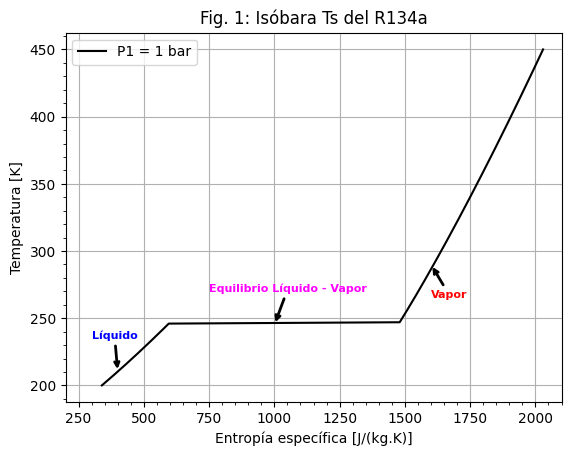

In [12]:
titulo_fig_1 = "Fig. 1: Isóbara Ts del R134a"
config_diagrama_Ts(titulo_fig_1)
plt.plot(entropias_P1, temperaturas_isobaras, '-k', label="P1 = 1 bar")
estilo_anotacion = {
    "fontsize": 8,
    "fontweight": "semibold",
    "arrowprops": dict(linewidth=2, arrowstyle="->")
    }
plt.annotate("Líquido",
             xy=(400, 210), xytext=(300, 235),
             color="blue", **estilo_anotacion)
plt.annotate("Equilibrio Líquido - Vapor",
             xy=(1000, 245), xytext=(750, 270),
             color="magenta", **estilo_anotacion)
plt.annotate("Vapor",
             xy=(1600, 290), xytext=(1600, 265),
             color="red", **estilo_anotacion)
plt.xlim(200, 2100)
plt.legend()
plt.show()

Podemos diferenciar 3 regiones en la isóbara graficada.

- **Líquido subenfriado**: la entropía aumenta linealmente con la temperatura, hasta alcanzar el punto de líquido saturado.
- **Equilibrio líquido-vapor**: la temperatura se mantiene constante (calor latente), pero la entropía sigue aumentando a medida que evoluciona la transición de líquido saturado (izquierda) hasta vapor saturado (derecha).
- **Vapor sobrecalentado**: la entropía aumenta linealmente con la temperatura, desde la condición de vapor saturado hasta la temperatura final deseada.

La pendiente de la recta de vapor sobrecalentado es diferente a la de líquido subenfriado, debido a que cada fase tiene su propia capacidad calorífica `Cp`.

### Cálculos Ts: líneas isóbaras

Para construir un diagrama Ts más completo, debemos calcular varias isóbaras. Una vez definida la lista de presiones de trabajo, se calculan las entropías para cada isóbara mediante un `dict comprehension`:



In [13]:
Pc_bar = Pc * 10**-5
presiones_bar_isobaras = [0.1, 1, 10, Pc_bar, 50, 100]
# dict comprehension
entropias_isobaras = {
    Pi: calc_entropias_isobara(fluido=R134a, T=temperaturas_isobaras, P_bar=Pi)
    for Pi in presiones_bar_isobaras
    }

### Cálculos Ts: líneas de saturación

Para calcular las líneas de equilibrio líquido-vapor, debemos definir un nuevo rango de temperaturas que no exceda la temperatura crítica `Tc`. La campana de saturación se construye a partir de la línea de líquido saturado, la línea de vapor saturado y el punto crítico (en el cual se unen ambas líneas).


In [14]:
# Intervalo de temperaturas
T0 = 200 # K
# Un valor de Tf más próximo al punto crítico (Tc = 374.21 K) eleva un
# 'CanteraError: Temperature out of range'
Tf = 374 # K
dT = 1.0 # K
num_puntos = 1 + int((Tf-T0)/dT)
T_sat_data = np.linspace(T0, Tf, num_puntos)
# Líquido saturado
sL_sat_data = calc_entropias_sat_TQ(fluido=R134a, T=T_sat_data, Q=0)
# Vapor saturado
sG_sat_data = calc_entropias_sat_TQ(fluido=R134a, T=T_sat_data, Q=1)
# Punto crítico
sc = calc_s_TP(R134a, Tc, Pc_bar)

### Diagrama Ts completo

Con la data disponible, ahora podemos graficar un diagrama Ts usando la librería `Matplotlib`:

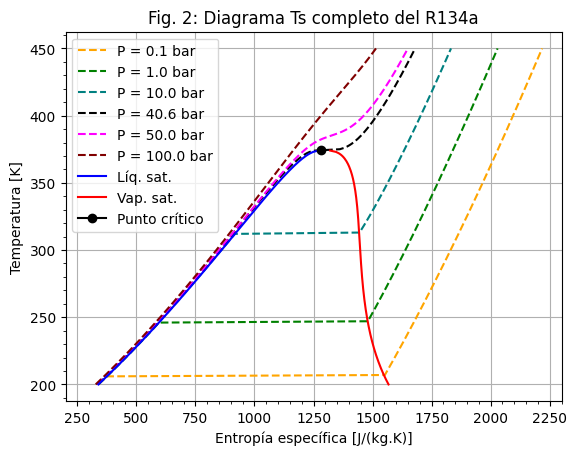

In [15]:
titulo_fig_2 = "Fig. 2: Diagrama Ts completo del R134a"
config_diagrama_Ts(titulo_fig_2)
# Graficando isobaras
colores_isobaras = ['orange', 'green', 'teal', 'black', 'magenta', 'maroon']
for P, color in zip(presiones_bar_isobaras, colores_isobaras):
    plt.plot(
        entropias_isobaras[P], temperaturas_isobaras,
        label=f"{P = :.1f} bar",
        color=color,
        linestyle="dashed",
    )
# Graficando líneas de saturacion
plt.plot(sL_sat_data, T_sat_data, "-b", label="Líq. sat.")
plt.plot(sG_sat_data, T_sat_data, "-r", label="Vap. sat.")
# Graficando punto crítico
plt.plot(sc, Tc, "-ok", label="Punto crítico")
# Mostrando leyenda y gráfica
plt.xlim(200, 2300)
plt.legend()
plt.show()

- Las isóbaras subcríticas `(P < Pc)` muestran el mismo comportamiento de la figura 1.
- La isóbara crítica `(P = Pc = 40.6 bar)` no tiene tramos diferenciados, sino que es una curva continua con un punto de inflexión en el punto crítico. Esto indica que desaparece la diferencia entre "fase líquida" y "fase vapor".
- La isóbara supercrítica `P = 50 bar` tiene un comportamiento similar a la isóbara crítica, con desplazamiento del punto de inflexión; en cambio, la isóbara supercrítica `P = 100 bar` ya no tiene punto de inflexión.
- La entropía de vaporización (diferencia entre la entropía de vapor saturado `sG_sat` y la entropía de líquido saturado `sL_sat`) disminuye a medida que aumenta la temperatura, haciéndose cero en el punto crítico.
- En la región de vapor sobrecalentado (derecha de la línea de vapor saturado), la entropía aumenta al disminuir la presión bajo temperatura constante.
- En la región de líquido subenfriado (izquierda de la línea de líquido saturado), la presión no tiene efectos significativos sobre la entropía (*líquido incompresible*).

## Cálculos y diagramas Ph: fluido R134a

El objetivo de esta sección es construir un diagrama Ph (presión - entalpía) para el refrigerante R134a, dentro de un amplio rango de condiciones operativas. En tal sentido, necesitaremos calcular varias isotermas (líneas de temperatura constante), así como la región de equilibrio líquido-vapor (líneas de saturación).

### Funciones vectorizadas

A continuación, definimos nuestras propias funciones para calcular entalpía, trabajando con las unidades deseadas {T: K, P: bar, h: kJ/kg}:

In [16]:
def calc_h_TP(fluido, T, P_bar):
    P = P_bar * 10**5
    fluido.TP = T, P
    h_kJ_kg = fluido.h / 1000
    return h_kJ_kg

def calc_h_sat_PQ(fluido, P_bar, Q):
    """Calcula la entalpía específica {h: kJ/(kg.K)} en la región de
    saturación para un fluido disponible en la librería Cantera, a
    partir de la presión {P: bar} y calidad de vapor {Q: --}
    especificadas"""
    P = P_bar * 10**5
    fluido.PQ = P, Q
    return fluido.h / 1000

Luego, aplicamos la **vectorización** de `NumPy` para trabajar con arreglos de múltiples valores:

In [17]:
calc_entalpias_isoterma = np.vectorize(calc_h_TP, excluded={"fluid", "T"})
calc_entalpias_sat_PQ = np.vectorize(calc_h_sat_PQ, excluded={"fluido", "Q"})
id_fases_isoterma = np.vectorize(id_fase_TP, excluded={"fluid", "T"})

### Cálculos Ph: isoterma T1 = 300 K

Utilizando la función `np.logspace`, vamos a definir un rango de presiones con suficientes puntos **logarítmicamente** equiespaciados. Este tipo de espaciado resulta útil cuando una variable cambia mucho su orden de magnitud, lo cual ocurre típicamente con la presión. En este ejemplo, trabajaremos con presiones desde $10^{-2}$ bar hasta $10^{+2}$ bar.

Todos los puntos estarán a igual temperatura (T1 = 300 K). Para cada estado `(T1, P)`, se calculará la respectiva entalpía `h` y se determinará su fase.

In [18]:
# Intervalo de presiones
# P: 0.01 bar - 100 bar
presiones_bar_isotermas = np.logspace(-2, 2, 400)
# Temperatura especificada
T1 = 300 # K
# Cálculo de propiedades
kwargs_T1 = {'fluido': R134a, 'T': T1, 'P_bar': presiones_bar_isotermas}
entalpias_T1 = calc_entalpias_isoterma(**kwargs_T1)
fases_T1 = id_fases_isoterma(**kwargs_T1)
# Representación tabular --> pandas DataFrame
isoterma_Ph_T1 = {
    'P [bar]': presiones_bar_isotermas,
    'h [kJ/kg]': entalpias_T1,
    'Fase': fases_T1,
    }
pd.DataFrame(isoterma_Ph_T1)

,P [bar],h [kJ/kg],Fase
0,0.010000,227.764562,gas
1,0.010234,227.764155,gas
2,0.010472,227.763739,gas
3,0.010717,227.763313,gas
4,0.010967,227.762877,gas
...,...,...,...
395,91.180034,37.977927,supercritical
396,93.309274,38.017130,supercritical
397,95.488237,38.057873,supercritical
398,97.718083,38.100210,supercritical


### Diagrama Ph: isoterma T1 = 300 K

Para visualizar mejor los resultados, graficaremos un primer diagrama Ph. Definimos una función que sirva como "plantilla" para este tipo de figuras; más adelante, la reutilizaremos para graficar el diagrama completo. Nuevamente, trabajaremos con la librería `Matplotlib`.

In [19]:
def config_diagrama_Ph(titulo: str) -> None:
    plt.title(titulo)
    plt.xlabel("Entalpía específica [kJ/kg]")
    plt.ylabel("Presión [bar]")
    plt.yscale("log")   # Escalado logarítmico (presión)
    plt.minorticks_on() # Subdivisiones secundarias en los ejes
    plt.grid(True)      # cuadriculado

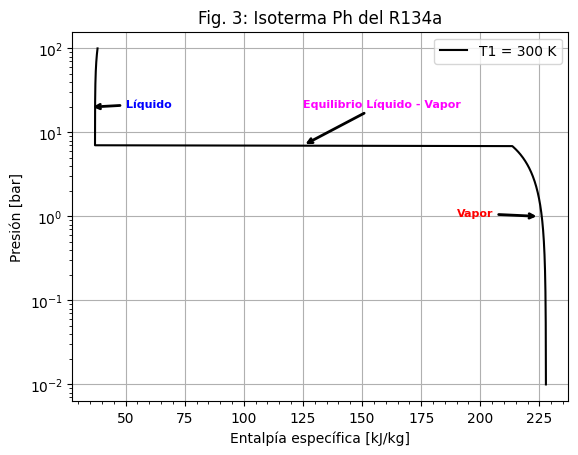

In [20]:
titulo_fig_3 = "Fig. 3: Isoterma Ph del R134a"
config_diagrama_Ph(titulo_fig_3)
plt.plot(entalpias_T1, presiones_bar_isotermas, '-k', label="T1 = 300 K")
estilo_anotacion = {
    "fontsize": 8,
    "fontweight": "semibold",
    "arrowprops": dict(linewidth=2, arrowstyle="->")
    }
plt.annotate("Líquido",
             xy=(35, 20), xytext=(50, 20),
             color="blue", **estilo_anotacion)
plt.annotate("Equilibrio Líquido - Vapor",
             xy=(125, 7), xytext=(125, 20),
             color="magenta", **estilo_anotacion)
plt.annotate("Vapor",
             xy=(225, 1), xytext=(190, 1),
             color="red", **estilo_anotacion)
plt.legend()
plt.show()

Podemos diferenciar 3 regiones en la isoterma graficada.

- **Líquido subenfriado**: la entalpía es prácticamente constante respecto a la presión; se puede aplicar la aproximación de *líquido incompresible*.
- **Equilibrio líquido-vapor**: la presión se mantiene constante, pero la entalpía sigue aumentando a medida que evoluciona la transición de líquido saturado (izquierda) hasta vapor saturado (derecha).
- **Vapor sobrecalentado**: la entalpía aumenta ligeramente a medida que disminuye la presión, hasta prácticamente alcanzar su valor límite de *gas ideal*.

Sobre las escalas de la figura 3, se pueden comentar los siguientes puntos:
- De haber mantenido las unidades originales para h (J/Kg), tendríamos valores 1000 veces mayores en el eje de entalpía (50000 - 225000), lo cual restaría legibilidad. Dividir por 1000 (para cambiar la unidad) es un ejemplo de transformación lineal.
- Se utilizó una escala logarítmica (en lugar de lineal) para el eje de P, porque esta variable cambia significativamente su orden de magnitud (10^-2 --> 10^+2 bar). Esto es un ejemplo de transformación logarítmica. Con una escala lineal, veríamos mejor qué ocurre a altas presiones pero no se distinguiría apropiadamente qué ocurre a bajas presiones (por ejemplo: P <= 1 bar).


### Cálculos Ph: líneas isotermas

Para construir un diagrama Ph más completo, debemos calcular varias isotermas. Una vez definida la lista de temperaturas de trabajo, se calculan las entalpías para cada isoterma mediante un `dict comprehension`:

In [21]:
Tc = 374.21 # K
temperaturas_isotermas = [185, 205, 245, 310, Tc, 450] # K
# dict_comprehension
entalpias_isotermas = {
    Ti: calc_entalpias_isoterma(R134a, Ti, presiones_bar_isotermas)
    for Ti in temperaturas_isotermas
    }

### Cálculos Ph: líneas de saturación

Para calcular las líneas de equilibrio líquido-vapor, debemos definir un nuevo rango de presiones que no exceda la presión crítica `Pc`. La campana de saturación se construye a partir de la línea de líquido saturado, la línea de vapor saturado y el punto crítico (en el cual se unen ambas líneas).

In [22]:
# Rango de presiones de saturación
P0 = 0.01 # bar
# La Pc es 40.6 bar. El programa eleva una excepción 'CanteraError' si
# intentamos con Pf >= 40.0 bar
Pf = 39.9
presiones_sat_bar = np.logspace(np.log10(P0), np.log10(Pf), 200)
# Líquido saturado
hL_sat_data = calc_entalpias_sat_PQ(fluido=R134a, P_bar=presiones_sat_bar, Q=0)
# Vapor saturado
hG_sat_data = calc_entalpias_sat_PQ(fluido=R134a, P_bar=presiones_sat_bar, Q=1)
# Punto crítico
hc = calc_h_TP(R134a, Tc, Pc_bar)

### Diagrama Ph completo


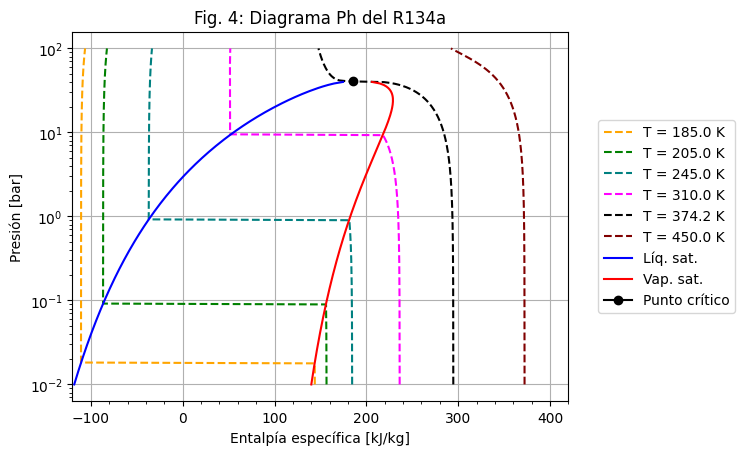

In [23]:
titulo_fig_4 = "Fig. 4: Diagrama Ph del R134a"
config_diagrama_Ph(titulo_fig_4)
colores_isotermas = [
    'orange',
    'green',
    'teal',
    'magenta',
    'black',
    'maroon'
    ]
# Graficando isotermas
for T, color in zip(temperaturas_isotermas, colores_isotermas):
    plt.plot(
        entalpias_isotermas[T],
        presiones_bar_isotermas,
        label=f"{T = :.1f} K",
        color=color,
        linestyle="dashed",
        )
# Graficando líneas de saturacion
plt.plot(hL_sat_data, presiones_sat_bar, "-b", label="Líq. sat.")
plt.plot(hG_sat_data, presiones_sat_bar, "-r", label="Vap. sat.")
# Graficando punto crítico
plt.plot(hc, Pc_bar, "-ok", label="Punto crítico")
# Limites del eje horizontal
plt.xlim(-120, 420)
# Mostrando leyenda y gráfica
plt.legend(loc="center right", bbox_to_anchor=(1.35, 0.5))
plt.show()

- Las isotermas subcríticas `(T < Tc)` muestran el mismo comportamiento de la figura 3, tal como se esperaba.
- La isoterma crítica `(T = Tc = 347.2 K)` no tiene tramos diferenciados, sino que es una curva continua con un punto de inflexión en el punto crítico. Esto indica que desaparece la diferencia entre "fase líquida" y "fase vapor".
- La isoterma supercrítica `T = 450 K` es una curva continua, a semejanza de la isoterma crítica, pero sin punto de inflexión.
- La entalpía de vaporización (diferencia entre la entropía de vapor saturado `sG_sat` y la entropía de líquido saturado `sL_sat`) disminuye a medida que aumenta la temperatura, haciéndose cero en el punto crítico.
- En la región de vapor sobrecalentado (derecha de la línea de vapor saturado), la entropía aumenta al disminuir la presión bajo temperatura constante.
- En la región de líquido subenfriado (izquierda de la línea de líquido saturado), la presión no tiene efectos significativos sobre la entropía (*líquido incompresible*).


### Aplicaciones del diagrama Ph

Hasta ahora, nos hemos enfocado en cómo calcular las propiedades termodinámicas y graficarlas apropiadadamente. Una pregunta interesante sería: **¿Cómo podemos aplicar la información de un diagrama Ph?**

La mínima temperatura que se puede lograr con un ciclo de refrigeración depende de la presión del evaporador y del fluido refrigerante. Por ejemplo, si el evaporador opera a una presión P = 1 bar, la temperatura de saturación correspondiente para el R134a sería T = 205 K, porque esa isoterma coincide con la línea de P = 1 bar dentro de la campana de saturación. Además, leyendo las entalpías de vapor saturado (hG_sat = 180 kJ/kg) y líquido saturado (hL_sat = -40 kJ/kg), se obtiene por diferencia la entalpía de vaporización (h_vap = 220 kJ/kg). Podríamos concluir lo siguiente:

> A una presión de 1 bar, se puede utilizar R134a para refrigerar un espacio de trabajo hasta 205 K, con una capacidad de enfriamiento de 220 kJ por cada 1 kg de refrigerante consumido.

La temperatura máxima del ciclo de refrigeración ocurre en el condensador, cuando el refrigerante cede calor al ambiente. Si consideramos una T = 310 K (ligeramente superior a la del ambiente), entonces la presión del condensador sería P = 10 bar (ver isoterma en la campana). Aplicando un análisis similar al evaporador, se obtiene la entalpía de vaporización: h_vap = 170 kJ/Kg. Podríamos concluir que:

> Para una temperatura de 310 K en el condensador, la presión requerida para el R134a es de 10 bar y se desecha calor a razón de 170 kJ por cada 1 kg de refrigerante.

## Conclusiones

- Python ofrece varias herramientas de cálculo aplicables a Ingeniería.
- La librería Cantera permite calcular de forma rápida y exacta las propiedades termodinámicas varios fluidos puros, como el agua y el refrigerante R134a.
- La librería NumPy permite aplicar funciones sobre arreglos de muchos datos.
- La librería Matplotlib permite graficar conjuntos de datos, con varias funcionalidades para personalizar las figuras.
- Las transformaciones de variables y cambios de escalas son estrategias útiles para el análisis de datos.
- Los diagramas termodinámicos son útiles para identificar condiciones operativas en ciclos de refrigeración.
